In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fretbursts as fb

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.6.5+53.g50a91a5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
folder = Path('../Relevant BH measurements/dsDNA/photonHDF5/')

In [3]:
[f.name for f in folder.glob('*.hdf5')]

['dsdna_d17_1.hdf5',
 'dsdna_d17_2.hdf5',
 'dsdna_d17_3.hdf5',
 'dsdna_d7+d17_50_50_1.hdf5',
 'dsdna_d7+d17_50_50_2.hdf5',
 'dsdna_d7+d17_50_50_3.hdf5',
 'dsdna_d7_1.hdf5',
 'dsdna_d7_2.hdf5',
 'dsdna_d7_3.hdf5',
 'irfs_dsdna.hdf5']

In [4]:
fname = folder / Path('irfs_dsdna.hdf5')
assert fname.is_file(), 'File not found.'

In [5]:
d = fb.loader.photon_hdf5(fname)

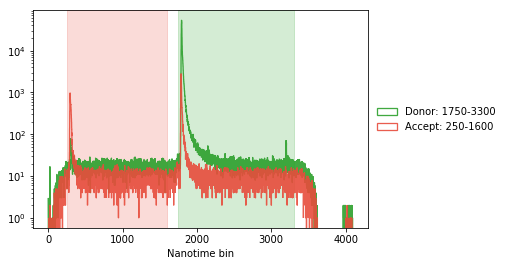

In [6]:
fb.plot_alternation_hist(d)

In [7]:
fb.loader.nsalex_apply_period(d)

In [8]:
d.nanotimes_params

[{'tcspc_num_bins': 4096,
  'tcspc_range': 6.0122042368e-08,
  'tcspc_unit': 1.4678233e-11}]

In [9]:
nanotime = d.nanotimes[0]
DD = d.get_ph_mask(ph_sel=fb.Ph_sel(Dex='Dem'))
DA = d.get_ph_mask(ph_sel=fb.Ph_sel(Dex='Aem'))
AA = d.get_ph_mask(ph_sel=fb.Ph_sel(Aex='Aem'))

In [10]:
bins = np.arange(0, d.nanotimes_params[0]['tcspc_num_bins'] + 1, 1)
nanot_hist_dd, _ = np.histogram(nanotime[DD], bins=bins)
nanot_hist_da, _ = np.histogram(nanotime[DA], bins=bins)
nanot_hist_aa, _ = np.histogram(nanotime[AA], bins=bins)

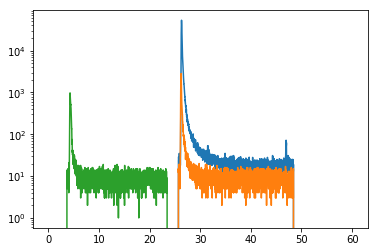

In [11]:
time_axis = bins[:-1] * d.nanotimes_params[0]['tcspc_unit'] * 1e9
plt.plot(time_axis, nanot_hist_dd)
plt.plot(time_axis, nanot_hist_da)
plt.plot(time_axis, nanot_hist_aa)
plt.yscale('log')

# Save decays

In [12]:
folder

PosixPath('../Relevant BH measurements/dsDNA/photonHDF5')

In [13]:
decays = pd.DataFrame({'DD': nanot_hist_dd, 'DA': nanot_hist_da, 'AA': nanot_hist_aa},
                      index=time_axis)
decays.index.name = 'time_ns'
decays.head()

,AA,DA,DD
time_ns,,,
0.000000,0,0,0
0.014678,0,0,0
0.029356,0,0,0
0.044035,0,0,0
0.058713,0,0,0


In [51]:
fname.parents[1] / 'results/'

PosixPath('../Relevant BH measurements/dsDNA/results')

In [52]:
export_fname = fname.parents[1] / 'results/' / (fname.stem + '_exported_decays.csv') 
export_fname

PosixPath('../Relevant BH measurements/dsDNA/results/irfs_dsdna_exported_decays.csv')

In [53]:
decays.to_csv(export_fname)